## Basic Statistics for Finance and Economics

data import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as pdr

start_date = '2020-01-01'
end_date = '2024-05-13'
ticker = '005930'

samsung = pdr.DataReader(
    ticker, # ticker
    'naver', # data source
    start = start_date, # start date
    end = end_date # end date
).astype(float)
samsung.index = pd.to_datetime(samsung.index) # convert to datetime index

### 1. Asset Returns

대부분의 금융 연구는 자산의 가격 대신 수익률을 사용한다. 그 이유는 다음과 같다
1. 일반 투자자들에게 자산의 수익은 투자 기회에 대한 완전하고 규모가 없는 요약이다
2. 전자가 더 매력적인 통계적 특성을 가지고 있기 때문에, 수익률 시계열은 가격 시계열보다 다루기 쉽다

#### One period Simple Return

$t-1$기부터 $t$기까지의 자산을 보유하였을 때의 simple growth return은 다음과 같이 표현할 수 있다

$$1 + R_t = \frac{P_t}{P_{t-1}}~~~~~\mbox{or}~~~~~P_t = P_{t-1}(1 + R_t)$$

simple net return 혹은 simple return은 다음과 같이 표현 가능하다

$$R_t = \frac{P_t - P_{t-1}}{P_{t-1}}$$

1기간 수익률은 pandas DataFrame에 내장된 `pct_change()` method로 간단하게 구현을 해낼 수 있다.

In [2]:
ret = samsung['Close'].pct_change()
ret.head() # return series

Date
2020-01-02         NaN
2020-01-03    0.005435
2020-01-06    0.000000
2020-01-07    0.005405
2020-01-08    0.017921
Name: Close, dtype: float64

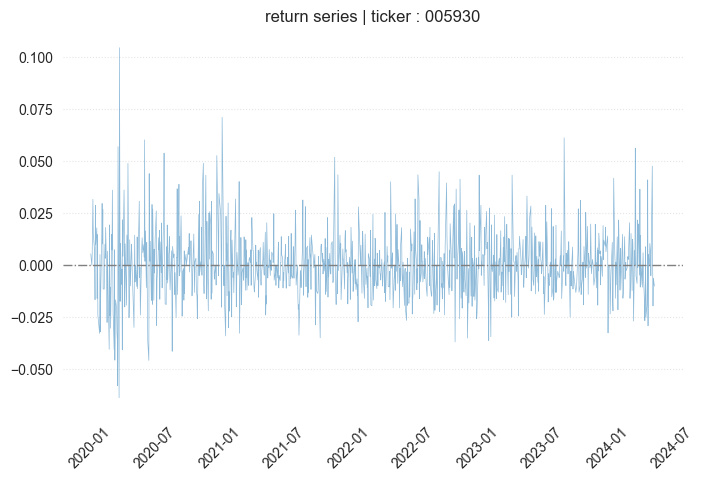

In [3]:
fig, ax = plt.subplots(figsize = (8, 5))

ax.plot(
    ret,
    alpha = 0.5,
    lw = 0.5
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 

plt.xticks(rotation = 45)
plt.axhline(y = 0, color = 'gray', ls = '-.', lw = 1)
plt.title(f'return series | ticker : {ticker}')
plt.show()

혹은 다음과 같이 `shift` method를 이용해 직접 계산하는 방식으로 구현할 수도 있다.

In [4]:
ret = (samsung['Close'] - samsung['Close'].shift(1)) / samsung['Close'].shift(1)

In [5]:
ret.head()

Date
2020-01-02         NaN
2020-01-03    0.005435
2020-01-06    0.000000
2020-01-07    0.005405
2020-01-08    0.017921
Name: Close, dtype: float64

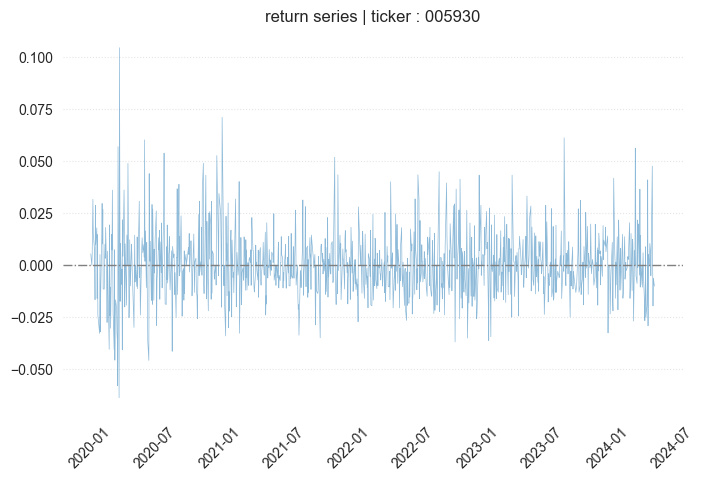

In [6]:
fig, ax = plt.subplots(figsize = (8, 5))

ax.plot(
    ret,
    alpha = 0.5,
    lw = 0.5
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 

plt.xticks(rotation = 45)
plt.axhline(y = 0, color = 'gray', ls = '-.', lw = 1)
plt.title(f'return series | ticker : {ticker}')
plt.show()

#### Multiperiod Simple Return

자산을 k 기간동안 보유하였을 때의 simple growth return은
$$1 + R_t[k] = \frac{P_t}{P_{t-k}} = (1 + R_t)(1+R_{t-1})\cdots(1+R_{t-k+1})=\prod_{j=0}^{k-1}(1+R_{t-j})$$
이다. pandas에서는 이를 위해 `cumprod()` method를 사용한다

In [7]:
multi_period_returns = (1 + ret).cumprod()

In [8]:
multi_period_returns.head()

Date
2020-01-02         NaN
2020-01-03    1.005435
2020-01-06    1.005435
2020-01-07    1.010870
2020-01-08    1.028986
Name: Close, dtype: float64

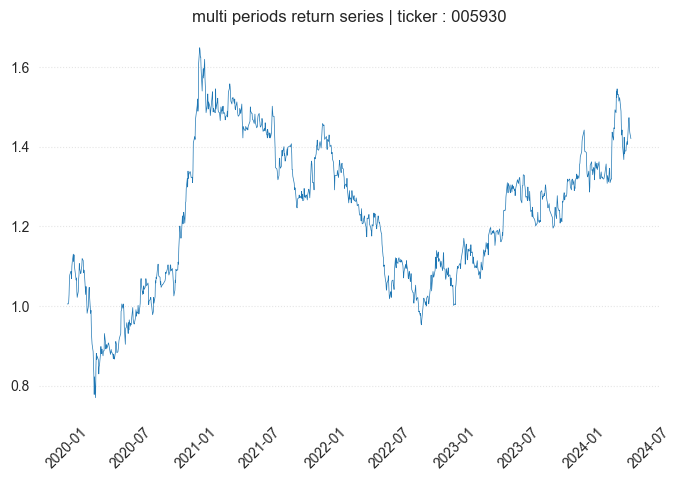

In [9]:
fig, ax = plt.subplots(figsize = (8, 5))

ax.plot(
    multi_period_returns,
    lw = 0.5
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 

plt.xticks(rotation = 45)
plt.title(f'multi periods return series | ticker : {ticker}')
plt.show()

위 방법이 조금 헷갈린다면 직접 구할수도 있다. 전체 기간의 가격을 첫날 가격으로 나누면 multi period returns를 쉽게 구할 수 있다

In [10]:
multi_period_returns = samsung['Close'] / samsung['Close'].iloc[0]

In [11]:
multi_period_returns.head()

Date
2020-01-02    1.000000
2020-01-03    1.005435
2020-01-06    1.005435
2020-01-07    1.010870
2020-01-08    1.028986
Name: Close, dtype: float64

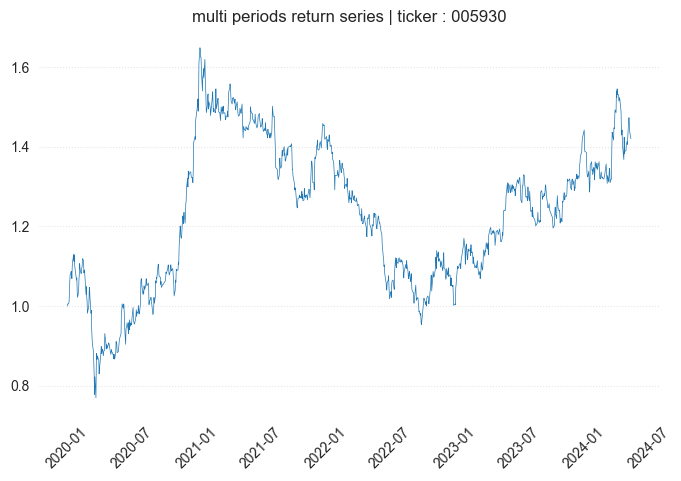

In [12]:
fig, ax = plt.subplots(figsize = (8, 5))

ax.plot(
    multi_period_returns,
    lw = 0.5
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 

plt.xticks(rotation = 45)
plt.title(f'multi periods return series | ticker : {ticker}')
plt.show()

Annualized average return은 다음과 같이 정의한다

$$\mbox{Annualized}\left\{R_t[k]\right\} = \left[ \prod_{j=0}^{k-1}(1+R_{t-j}) \right]^{\frac{1}{k}} -1$$

계산의 편의를 위해 다음과 같이 쓰기도 한다

$$\mbox{Annualized}\left\{R_t[k]\right\} = \exp \left[ \frac{1}{k} \sum_{j=0}^{k-1}\ln(1+R_{t-j}) \right] -1$$

In [13]:
annualized_ret = (multi_period_returns.loc[:'2020-03']) ** (12 / 3) - 1

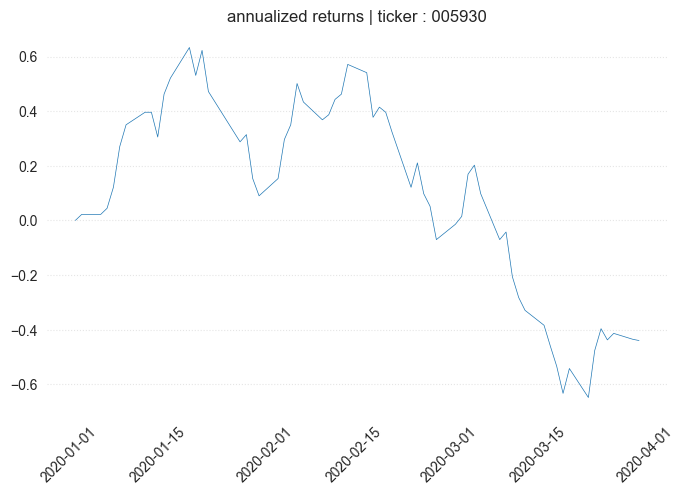

In [14]:
fig, ax = plt.subplots(figsize = (8, 5))

ax.plot(
    annualized_ret,
    lw = 0.5
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 

plt.xticks(rotation = 45)
plt.title(f'annualized returns | ticker : {ticker}')
plt.show()

#### Continuously Compounded Return

log 수익률을 사용하면 다음과 같은 이점이 있다.
1. 계산이 매우 편해진다
2. 비선형성이 감소한다
3. 정규분포를 따르게 된다
4. 수익률이 보수적으로 추정되기 때문에, 성과 지표로 비교하기 유용하다

log return은 다음과 같다

$$r_t = \ln(1 + R_t) = \ln\frac{P_t}{P_{t-1}} = p_t - p_{t-1}$$

여기에서 $p_t = \ln P_t$이다

In [15]:
log_return = np.log(samsung['Close'] / samsung['Close'].shift(1))

In [16]:
log_return.head()

Date
2020-01-02         NaN
2020-01-03    0.005420
2020-01-06    0.000000
2020-01-07    0.005391
2020-01-08    0.017762
Name: Close, dtype: float64

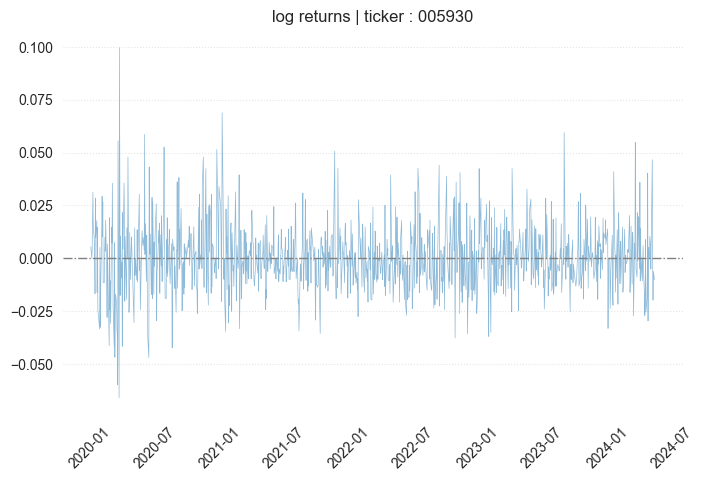

In [17]:
fig, ax = plt.subplots(figsize = (8, 5))

ax.plot(
    log_return,
    lw = 0.5,
    alpha = 0.5
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 

plt.xticks(rotation = 45)
plt.axhline(y = 0, color = 'gray', ls = '-.', lw = 1)
plt.title(f'log returns | ticker : {ticker}')
plt.show()

정규성이 개선되었는지 확인해 보기 위해, histogram을 확인할 수 있다

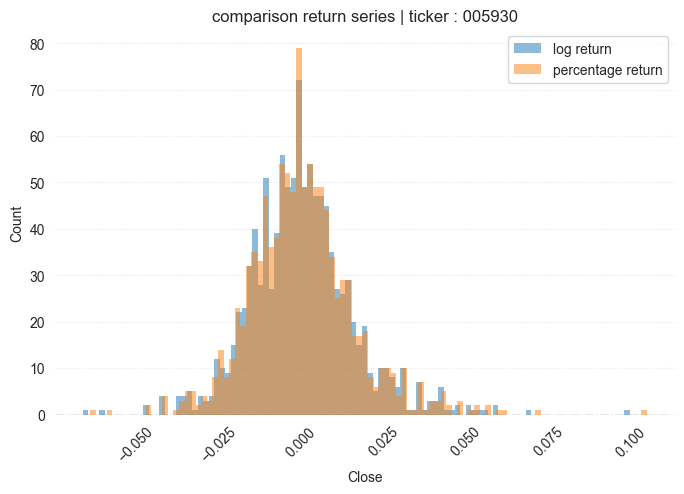

In [18]:
fig, ax = plt.subplots(figsize = (8, 5))

sns.histplot(
    log_return,
    alpha = 0.5,
    ax = ax,
    edgecolor = 'none',
    label = 'log return',
    bins = 100
)
sns.histplot(
    ret,
    alpha = 0.5,
    ax = ax,
    edgecolor = 'none',
    label = 'percentage return',
    bins = 100
)
plt.legend()
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 

plt.xticks(rotation = 45)
plt.axhline(y = 0, color = 'gray', ls = '-.', lw = 1)
plt.title(f'comparison return series | ticker : {ticker}')
plt.show()

### 2. Distributional Properties of Returns

수익률을 분석하기 위해서는 기본적인 통계적 특성들을 알아야 한다

#### first moments (mean)

$$\hat{μ} = \frac{1}{T}\sum_{t=1}^T x_t$$

정준모수라고도 하며, 데이터를 대표하는 값들 중 가장 많이 사용되는 값이다. 중심극한 정리에 의해, 표본이 충분히 크면 표본평균은 모평균의 값을 대표할 수 있다. 여기서 환기해야 할 점은, 표본평균은 계산식이 쉽기 때문에 자주 잊어먹지만 추정된 모수라는 점을 잊지 말아야 한다. 표본 추출방법에 오류가 있을 경우 얼마든지 편향이 존재할 수 있다. 

대표적으로 데이터가 정규분포가 아니고, 독립적인 표본 추출이 이뤄지지 못했다면 편향된 추정치가 될 수도 있다.

In [19]:
mean = ret.mean()

print(f'mean of return series : {mean : .4f}')

mean of return series :  0.0005


#### median

median (odd n)
$$\text{Median} = x_{\left(\frac{n+1}{2}\right)}$$

median (even n)
$$\text{Median} = \frac{x_{\left(\frac{n}{2}\right)} + x_{\left(\frac{n}{2}+1\right)}}{2}$$

mean은 outlier에 민감한 경향이 있으며, 표본이 작은 경우에는 종종 좋은 대표값이 되지 못한다. 이러한 데이터에서는 평균을 대표하는 값으로 median이 적절한 대안이 될 수 있다. 다만, 추정치에 서수적 특성이 들어가 있기 때문에 해석에 유의가 필요하다

In [20]:
median = ret.median()

print(f'median of return series : {median : .4f}')

median of return series :  0.0000


#### mode

$$\text{Mode} = \text{value with the highest frequency in the dataset}$$

mode는 데이터 내에서 가장 빈번하게 발생한 값을 의미한다. 중심값을 대변하지는 못하지만 이산적인 데이터 혹은 명목척도로 이뤄진 데이터를 다룰 때 유용할 때가 있다.

In [21]:
mode = np.round(ret, 2).mode()[0]

print(f'mode of return series : {mode : .4f}')

mode of return series :  0.0000


#### second moments (variance)

$$\hat{σ_x^2} = \frac{1}{T-1}\sum_{t=1}^T (x_t - \hat\mu_x)^2$$

분산은 데이터가 평균으로부터 얼마나 벗어났는지 볼 수 있는 통계치이며, 산포모수라고 한다. 표본분산에서는 편향을 줄이기 위해 전체 표본의 수에서 자유도(degree of freedom)만큼 빼준 값을 나눠서 추정한다. 분산은 금융, 경제를 비롯해 사회과학 전반에서 의미있게 사용되는 추정치이다.

In [22]:
variance = ret.var(ddof = 1)

print(f'variance of return series : {variance : .4f}')

variance of return series :  0.0003


표준편차는 분산에 로그를 씌운 값으로, 금융에서는 주로 단순 시장 리스크를 추정할 때 자주 사용된다.

In [23]:
std = ret.std(ddof = 1)

print(f'standard deviation of return series : {std : .4f}')

standard deviation of return series :  0.0160


#### third moments (skewness)

$$\hat{S}(x) = \frac{1}{(T-1)\hat\sigma_x^3}\sum_{t=1}^T(x_t-\hat\mu_x)^3$$
$$t = \frac{\hat S (r)}{\sqrt{6/T}}$$

표본왜도는 분포가 얼마나 치우쳐져 있는지를 나타내는 통계치이다. 오른쪽으로 꼬리가 길면 양의 왜도를 가지고 있다고 하고, 왼쪽으로 꼬리가 길 경우 음의 왜도를 가지고 있다고 한다. 대부분의 금융시장 데이터나 경제 데이터는 하락보다 상승이 더 큰 경우가 많기 떄문에, 양의 왜도를 가지고 있는 것이 일반적이다.

In [24]:
skew = ret.skew()

print(f'skewness of return series : {skew : .4f}')

skewness of return series :  0.6683


양의 왜도를 가지고 있는 경우 최빈값 < 중앙값 < 평균의 순으로 나열된다.

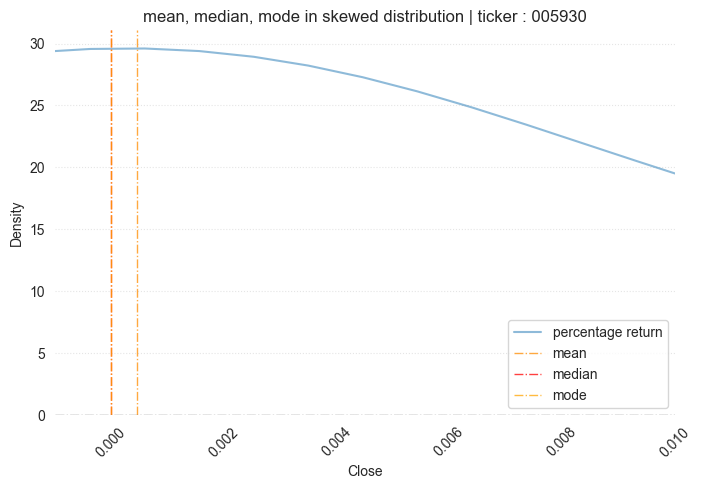

In [25]:
fig, ax = plt.subplots(figsize = (8, 5))

sns.kdeplot(
    ret,
    alpha = 0.5,
    ax = ax,
    label = 'percentage return',
)

for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 

plt.axvline(x = mean, ls = '-.', lw = 1, color = 'darkorange', alpha = 0.75, label = 'mean')
plt.axvline(x = median, ls = '-.', lw = 1, color = 'red', alpha = 0.75, label = 'median')
plt.axvline(x = mode, ls = '-.', lw = 1, color = 'orange', alpha = 0.75, label = 'mode')
plt.xticks(rotation = 45)
plt.legend()

plt.xlim([-0.001, 0.01])
plt.axhline(y = 0, color = 'gray', ls = '-.', lw = 1)
plt.title(f'mean, median, mode in skewed distribution | ticker : {ticker}')
plt.show()

#### forth moments (kurtosis)

$$\hat{K}(x) = \frac{1}{(T-1)\hat\sigma_x^4}\sum_{t=1}^T(x_t - \hat\mu_x)^4$$
$$t = \frac{\hat K (r) - 3}{\sqrt{24/T}}$$

첨도는 분포의 꼬리가 양 극단 방향으로 얼마나 치우쳐져 있는지 나타내는 통계치이다. 꼬리가 길고 몸통이 얇고 뾰족할 수록 첨도가 높게 계산된다. pandas에서는 pearson의 kurtosis를 사용하기 때문에 실제 첨도에서 3을 뺀 값으로 계산한다. (정규분포의 첨도 = 3, pearson kurtosis = 0)

In [26]:
kurt = ret.kurt()

print(f'pearson kurtosis of return series : {kurt : .4f}')
print(f'kurtosis of return series : {kurt + 3: .4f}')

pearson kurtosis of return series :  3.0281
kurtosis of return series :  6.0281


### 3. Statistics Test



#### Normality Test

In [27]:
import scipy.stats as stats

stat, p_value = stats.shapiro(ret.dropna())
print('Statistics = %.3f, p-value = %.3f' % (stat, p_value))

if p_value > 0.05:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics = 0.965, p-value = 0.000
Sample does not look Gaussian (reject H0)


#### Z-score Test

In [28]:
z_scores = np.abs((ret - np.mean(ret)) / np.std(ret))
outliers = ret[z_scores > 3]

In [29]:
print(outliers)

Date
2020-03-19   -0.058114
2020-03-20    0.057043
2020-03-23   -0.063877
2020-03-24    0.104706
2020-04-17    0.048980
2020-06-03    0.060311
2020-07-28    0.053957
2020-11-16    0.049051
2020-12-24    0.052774
2021-01-08    0.071170
2021-11-22    0.051966
2023-09-01    0.061286
2024-03-20    0.056319
Name: Close, dtype: float64


#### Stationarity Test

In [30]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(samsung['Close'])
print('ADF Statistic : %f' % result[0])
print('p-value : %f' % result[1])
print('Critical Values :')
for key, value in result[4].items():
    print('\t%s : %.3f' % (key, value))

if result[1] > 0.05:
    print('Time series is not stationary')
else:
    print('Time series is stationary')

ADF Statistic : -1.785179
p-value : 0.387844
Critical Values :
	1% : -3.436
	5% : -2.864
	10% : -2.568
Time series is not stationary


In [31]:
result = adfuller(ret.dropna())
print('ADF Statistic : %f' % result[0])
print('p-value : %f' % result[1])
print('Critical Values :')
for key, value in result[4].items():
    print('\t%s : %.3f' % (key, value))

if result[1] > 0.05:
    print('Time series is not stationary')
else:
    print('Time series is stationary')

ADF Statistic : -32.957735
p-value : 0.000000
Critical Values :
	1% : -3.436
	5% : -2.864
	10% : -2.568
Time series is stationary


### 4. Hypothesis Test

#### Null Hypothesis & Alternative Hypothesis

Null Hypothesis는 보통 사회적인 통념, 반박하고 싶은 주장이나 가설을 대입하고, Alternative Hypothesis는 연구자가 주장하고 싶은 주장이나 가설을 의미한다. 

$$\text{Null Hypothesis} :  H_0$$
$$\text{Alternative Hypothesis} : H_1$$

#### Type I & Type II error

#### Hypothesis Test in None-iid data

In [43]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
from tqdm import tqdm

rho_values = np.linspace(0, 0.95, 20) # auto correlation range
alpha_levels = np.linspace(0.01, 0.6, 60) # significance values
n = 1000
iterations = 100

type_1_errors = np.zeros((len(alpha_levels), len(rho_values)))
type_2_errors = np.zeros((len(alpha_levels), len(rho_values)))

In [44]:
for i, alpha in tqdm(enumerate(alpha_levels)):
    for j, rho in enumerate(rho_values):
        t1_error_count = 0
        t2_error_count = 0
        ar_params = np.array([1, -rho])
        ma_params = np.array([1])
        arma_process = ArmaProcess(ar_params, ma_params)
        
        for _ in range(iterations):
            # montecarlo simulation
            simulated_data = arma_process.generate_sample(nsample = n)
            x = np.linspace(0, 10, n)
            X = add_constant(x)
            y_null = simulated_data  
            model_null = OLS(y_null, X).fit()
            p_value_null = model_null.pvalues[1]
            
            # calculate type 1 error
            if p_value_null < alpha:
                t1_error_count += 1

            # estimate alternative hypothesis
            y_alt = simulated_data + 0.03 * x 
            model_alt = OLS(y_alt, X).fit()
            p_value_alt = model_alt.pvalues[1]
            
            # calculate type 2 error
            if p_value_alt > alpha:
                t2_error_count += 1
        
        type_1_errors[i, j] = t1_error_count / iterations
        type_2_errors[i, j] = t2_error_count / iterations

60it [01:25,  1.43s/it]


In [45]:
alpha_frame = pd.DataFrame(
    type_1_errors, 
    columns = np.round(rho_values, 2), 
    index = np.round(alpha_levels, 3)
)
beta_frame = pd.DataFrame(
    type_2_errors, 
    columns = np.round(rho_values, 2), 
    index = np.round(alpha_levels,3)
)

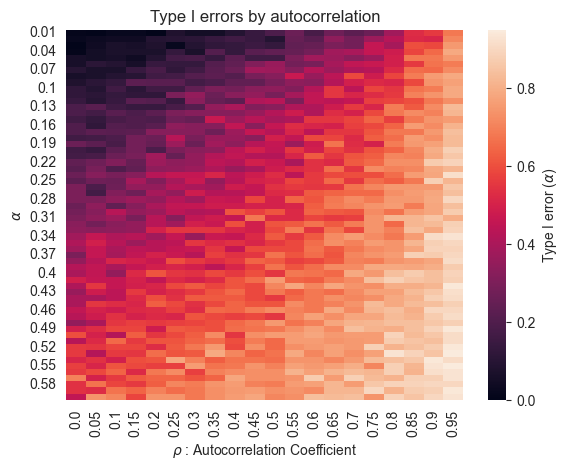

In [46]:
sns.heatmap(alpha_frame, cbar_kws = {r'label' : 'Type I error ($\\alpha$)'})
plt.xlabel(r'$\rho$ : Autocorrelation Coefficient')
plt.ylabel(r'$\alpha$')
plt.title('Type I errors by autocorrelation')
plt.show()

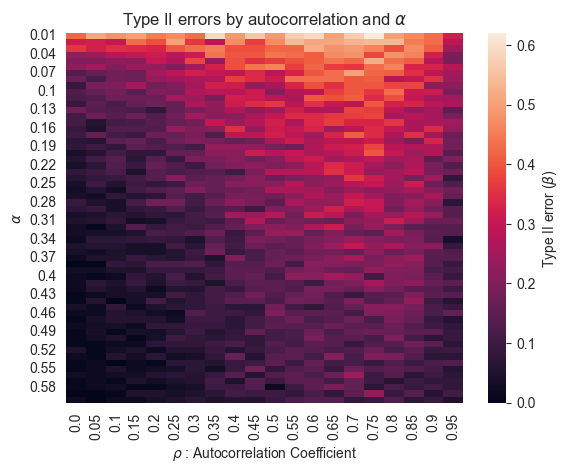

In [47]:
sns.heatmap(beta_frame, cbar_kws = {'label' : r'Type II error ($\beta$)'})
plt.xlabel(r'$\rho$ : Autocorrelation Coefficient')
plt.ylabel(r'$\alpha$')
plt.title(r'Type II errors by autocorrelation and $\alpha$')
plt.show()